In [3]:
from string import punctuation
from math import ceil
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt

In [4]:
book = "books/Shakespeare/much-ado-text.txt"
with open("books/Shakespeare/hamlet-text.txt", "r") as file:
    text = file.read()

# Tokenize the text into sentences
sentences = sent_tokenize(text)

sia = SentimentIntensityAnalyzer()
sentiment_scores = []

def punctuation_count(text):
    return sum([1 for char in text if char in punctuation])

bins = len(sentences)/100
print("bins: ",bins)

def get_value(sentence):
    return sia.polarity_scores(sentence)["compound"]

for sentence in sentences:
    value = get_value(sentence)
    sentiment_scores.append(value)

max_value = max(sentiment_scores)
min_value = min(sentiment_scores)

print("max_value", max_value)
print("\n\nSample sentences and the respective sentiment scores:")
for sentence in sentences:
    value = get_value(sentence)

    threshold = 0.99

    if max_value*threshold < value or min_value*threshold > value:
        print("\n",sentence,"\n has a score of:",value, "punct:",punctuation_count(sentence), "newlines:", sentence.count("\n"))

bins:  24.18
max_value 0.9682


Sample sentences and the respective sentiment scores:

 In the most high and palmy state of Rome,
A little ere the mightiest Julius fell,
The graves stood tenantless, and the sheeted dead
Did squeak and gibber in the Roman streets;
As stars with trains of fire and dews of blood,
Disasters in the sun; and the moist star,
Upon whose influence Neptune’s empire stands,
Was sick almost to doomsday with eclipse. 
 has a score of: -0.9602 punct: 9 newlines: 7

 Fie, ’tis a fault to heaven,
A fault against the dead, a fault to nature,
To reason most absurd, whose common theme
Is death of fathers, and who still hath cried,
From the first corse till he that died today,
This must be so. 
 has a score of: -0.9595 punct: 9 newlines: 5

 I have not
art to reckon my groans, but that I love thee best, O
most best, believe it. 
 has a score of: 0.9657 punct: 4 newlines: 2

 Beggar that I am, I am even poor in thanks;
but I thank you, and sure, dear friends, my thanks
are

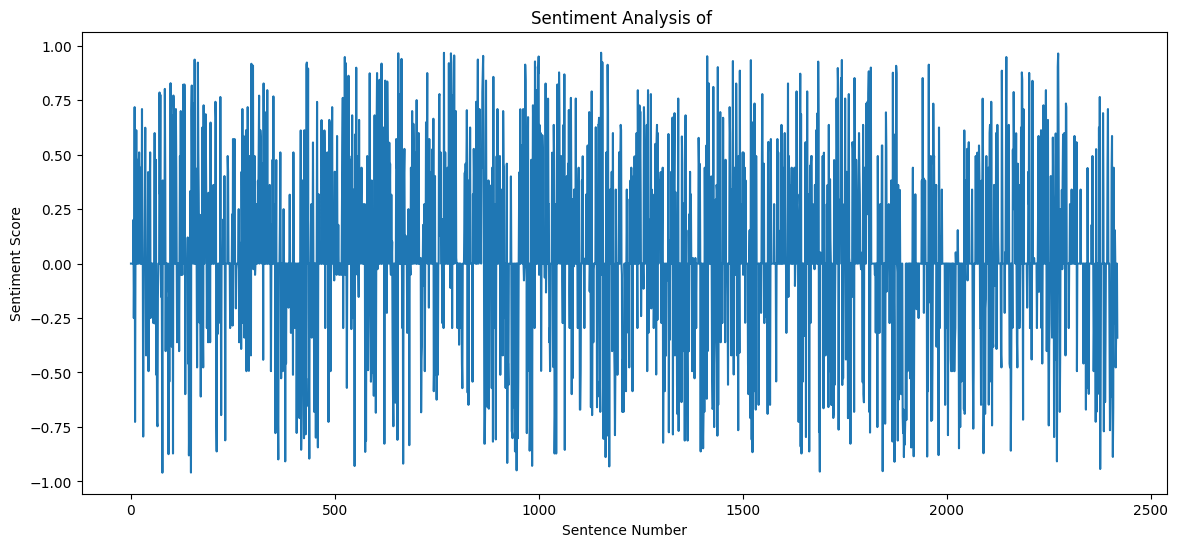

In [5]:
filtered_scores = sentiment_scores
sentence_numbers = list(range(1, len(sentiment_scores) + 1))

plt.figure(figsize=(14,6))
plt.plot(sentence_numbers, filtered_scores)
plt.xlabel("Sentence Number")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis of ")
plt.show()